In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.formula.api as smf
import statsmodels.api as sm
import io
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
import random
from scipy.stats import f 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# в данной работе было проведено исследование датасета healthcare-dataset-stroke-data, который я взяла с сайта kaggle:

- в нем содержаться данные об инсультах (stroke) и факторах, которые влияют на вероятность данного заболевания 
- в ходе работе была произведена спецификация, интерпетация, работа с разными типами переменных (дамми-переменные, категориальные и тд), тесты на значимость (T-test, F-test), тесты на мультиколинерность, гетерскетастичность и тд

In [2]:
df = pd.read_csv('stroke.csv')
df 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Датасет содержит информацию о пациентах, которые получили инсульт. В датасете представлены следующие переменные:

- id: уникальный идентификатор пациента
- gender: пол пациента (мужской, женский или другой)
- age: возраст пациента
- hypertension: наличие гипертонии у пациента (0 - нет, 1 - да)
- heart_disease: наличие заболеваний сердца у пациента (0 - нет, 1 - да)
- ever_married: был ли пациент когда-либо в браке (Yes или No)
- work_type: данные о работе пациента (Private, Self-employed, Govt_job, children, Never_worked)
- Residence_type: место жительства пациента (Urban или Rural)
- avg_glucose_level: средний уровень глюкозы в крови пациента
- bmi: индекс массы тела пациента
- smoking_status: статус курения пациента (formerly smoked, never smoked, smokes или Unknown)
- stroke: наличие инсульта у пациента (0 - нет, 1 - да)

Цель моей работы: Изучение факторов, влияющих на возникновение инсульта у пациентов.

In [3]:
df = pd.read_csv('stroke.csv')
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})
df['ever_married'] = df['ever_married'].replace({'Yes': 0, 'No': 1})
df 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,0,Private,0,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,1,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,0,Private,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,0,Private,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,0,Self-employed,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,0,Private,0,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,0,Self-employed,0,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,0,Self-employed,1,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,0,Private,1,166.29,25.6,formerly smoked,0


In [4]:
df_all = pd.get_dummies(df.loc[:,['gender','age','avg_glucose_level','heart_disease','Residence_type', 'stroke', 'hypertension', 'ever_married', 'work_type', 'bmi', 'smoking_status']])
df_all 

,age,avg_glucose_level,heart_disease,Residence_type,stroke,hypertension,ever_married,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,1,0,1,0,0,36.6,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,202.21,0,1,1,0,0,NaN,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,105.92,1,1,1,0,0,32.5,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,171.23,0,0,1,0,0,34.4,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,174.12,0,1,1,1,0,24.0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,0,0,0,1,0,NaN,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,125.20,0,0,0,0,0,40.0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,82.99,0,1,0,0,0,30.6,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,166.29,0,1,0,0,0,25.6,0,1,0,0,0,1,0,0,0,1,0,0


In [5]:
df_all = pd.get_dummies(df.loc[:,['age','avg_glucose_level','heart_disease', 'stroke', 'work_type', 'bmi', 'ever_married']])
df_all 

,age,avg_glucose_level,heart_disease,stroke,bmi,ever_married,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,228.69,1,1,36.6,0,0,0,1,0,0
1,61.0,202.21,0,1,NaN,0,0,0,0,1,0
2,80.0,105.92,1,1,32.5,0,0,0,1,0,0
3,49.0,171.23,0,1,34.4,0,0,0,1,0,0
4,79.0,174.12,0,1,24.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,0,0,NaN,0,0,0,1,0,0
5106,81.0,125.20,0,0,40.0,0,0,0,0,1,0
5107,35.0,82.99,0,0,30.6,0,0,0,0,1,0
5108,51.0,166.29,0,0,25.6,0,0,0,1,0,0


In [33]:
model = smf.ols(formula='stroke~age+avg_glucose_level+heart_disease+bmi+work_type+ever_married', data=df).fit()
model.params.round(3) 

Intercept                    -0.133
work_type[T.Never_worked]     0.033
work_type[T.Private]          0.014
work_type[T.Self-employed]   -0.005
work_type[T.children]         0.060
age                           0.003
avg_glucose_level             0.000
heart_disease                 0.059
bmi                          -0.000
ever_married                  0.030
dtype: float64

$$stroke = -0.105 + 0.003*age - 0.001*bmi - 0.062*heartdisease  +  0.067*worktype_{child} - 0.003*worktype_{self} - 0.12*worktype_{private} + worktype_{never}+ 0.030*married$$ 

$ \bigstar $  Интерпритация результата:
- при увеличении возраста участника на 1 год вероятность инсульта увеличивается на 0,2, при причих равных
- у пациентов когда-либо бывших женатыми или замужем вероятность инсульта увеличивается на 3
- при увелечении уровня глюкозы в рамках данной работы на 1 вероятность инсульта практически не изменяется, при прочих равных
- при наличии у пациента 1 сердечно-сосудистого заболевания вероятноть инсульта повышается на 6%
- при недостатачной массе тела вероятность инсульта понижается на 0.1% при прочих равных
- пациенты, никогда не работавшие, подвержены инсультам на 4,5% сильнее; пациенты, работающие в частном секторе, подвережены инсультам на 1,5% сильнее; самозанятые пациенты менее подвержены инсультам на 0,3%; дети подвержены инсультам на 6,7% сильнее остальных, при прочих равных

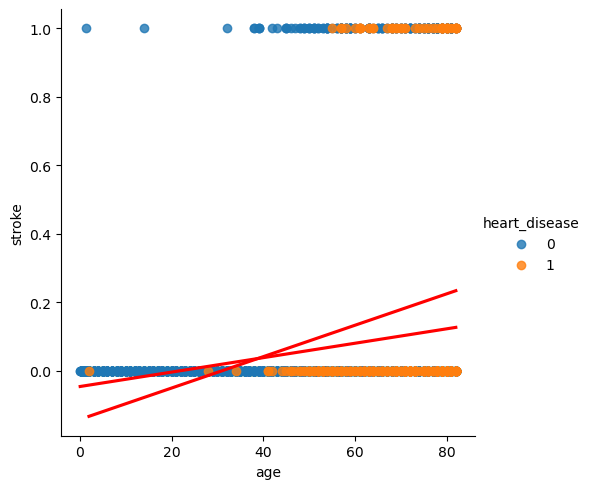

In [31]:
sns.lmplot(data=df, y='stroke', x='age', hue='heart_disease', ci=None, line_kws={"color": "r"})

## Далее было решено провести F-test and t-test, чтобы проверить значимость выбранной регрессии, начнем с t-test: 

In [7]:
table = model.summary(alpha=0.05).tables[1]
table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.1329,0.018,-7.220,0.000,-0.169,-0.097
work_type[T.Never_worked],0.0335,0.043,0.784,0.433,-0.050,0.117
work_type[T.Private],0.0138,0.009,1.599,0.110,-0.003,0.031
work_type[T.Self-employed],-0.0049,0.011,-0.468,0.640,-0.026,0.016
work_type[T.children],0.0596,0.014,4.313,0.000,0.033,0.087
age,0.0028,0.000,13.862,0.000,0.002,0.003
avg_glucose_level,0.0004,6.53e-05,5.507,0.000,0.000,0.000
heart_disease,0.0588,0.013,4.389,0.000,0.033,0.085
bmi,-0.0004,0.000,-0.998,0.318,-0.001,0.000
ever_married,0.0296,0.008,3.604,0.000,0.013,0.046


In [8]:
dfins = pd.read_html(model.summary(alpha=0.05).tables[1].as_html(), header=0, index_col=0)[0]
dfins 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.1329,0.018000,-7.220,0.000,-0.169,-0.097
work_type[T.Never_worked],0.0335,0.043000,0.784,0.433,-0.050,0.117
work_type[T.Private],0.0138,0.009000,1.599,0.110,-0.003,0.031
work_type[T.Self-employed],-0.0049,0.011000,-0.468,0.640,-0.026,0.016
work_type[T.children],0.0596,0.014000,4.313,0.000,0.033,0.087
age,0.0028,0.000000,13.862,0.000,0.002,0.003
avg_glucose_level,0.0004,0.000065,5.507,0.000,0.000,0.000
heart_disease,0.0588,0.013000,4.389,0.000,0.033,0.085
bmi,-0.0004,0.000000,-0.998,0.318,-0.001,0.000
ever_married,0.0296,0.008000,3.604,0.000,0.013,0.046


In [9]:
dfins['tvalues']  = dfins['coef'] / dfins['std err']
dfins

,coef,std err,t,P>|t|,[0.025,0.975],tvalues
Intercept,-0.1329,0.018000,-7.220,0.000,-0.169,-0.097,-7.383333
work_type[T.Never_worked],0.0335,0.043000,0.784,0.433,-0.050,0.117,0.779070
work_type[T.Private],0.0138,0.009000,1.599,0.110,-0.003,0.031,1.533333
work_type[T.Self-employed],-0.0049,0.011000,-0.468,0.640,-0.026,0.016,-0.445455
work_type[T.children],0.0596,0.014000,4.313,0.000,0.033,0.087,4.257143
age,0.0028,0.000000,13.862,0.000,0.002,0.003,inf
avg_glucose_level,0.0004,0.000065,5.507,0.000,0.000,0.000,6.125574
heart_disease,0.0588,0.013000,4.389,0.000,0.033,0.085,4.523077
bmi,-0.0004,0.000000,-0.998,0.318,-0.001,0.000,-inf
ever_married,0.0296,0.008000,3.604,0.000,0.013,0.046,3.700000


In [10]:
t_cri = stats.t.ppf(1-0.05/2, 5110 - 17 )
t_cri.round(3)

1.96

In [11]:
dfins['znachimosty'] = dfins.apply(lambda x : 'Значимо' if np.abs(x['tvalues']) > t_cri else 'не значимо', axis = 1 )
dfins

,coef,std err,t,P>|t|,[0.025,0.975],tvalues,znachimosty
Intercept,-0.1329,0.018000,-7.220,0.000,-0.169,-0.097,-7.383333,Значимо
work_type[T.Never_worked],0.0335,0.043000,0.784,0.433,-0.050,0.117,0.779070,не значимо
work_type[T.Private],0.0138,0.009000,1.599,0.110,-0.003,0.031,1.533333,не значимо
work_type[T.Self-employed],-0.0049,0.011000,-0.468,0.640,-0.026,0.016,-0.445455,не значимо
work_type[T.children],0.0596,0.014000,4.313,0.000,0.033,0.087,4.257143,Значимо
age,0.0028,0.000000,13.862,0.000,0.002,0.003,inf,Значимо
avg_glucose_level,0.0004,0.000065,5.507,0.000,0.000,0.000,6.125574,Значимо
heart_disease,0.0588,0.013000,4.389,0.000,0.033,0.085,4.523077,Значимо
bmi,-0.0004,0.000000,-0.998,0.318,-0.001,0.000,-inf,Значимо
ever_married,0.0296,0.008000,3.604,0.000,0.013,0.046,3.700000,Значимо


$ \bigstar $ Коэффициенты Intercept,work_type(T.children),age, avg_glucose_level, heart_disease, ever_married и bmi являются статистически значимыми.

# сделаем попытку протестировать отдельно категориальную переменную worktype, однако в силу некорректного названия столбца (self-employed), содержащего '-' в исходном датасете, пришлось также переиминовать столбец worktype self employed:

### H_0: $$ \beta*{worktype_{Selfemployed}} = \beta*{worktype_{Private}} = \beta*{worktype_{children}} = \beta*{worktype_{Neverworked}} = 0 $$

In [12]:
df_all = pd.get_dummies(df.loc[:,['age','avg_glucose_level','heart_disease', 'stroke', 'work_type', 'bmi', 'ever_married']])
df_all 

,age,avg_glucose_level,heart_disease,stroke,bmi,ever_married,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,228.69,1,1,36.6,0,0,0,1,0,0
1,61.0,202.21,0,1,NaN,0,0,0,0,1,0
2,80.0,105.92,1,1,32.5,0,0,0,1,0,0
3,49.0,171.23,0,1,34.4,0,0,0,1,0,0
4,79.0,174.12,0,1,24.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,0,0,NaN,0,0,0,1,0,0
5106,81.0,125.20,0,0,40.0,0,0,0,0,1,0
5107,35.0,82.99,0,0,30.6,0,0,0,0,1,0
5108,51.0,166.29,0,0,25.6,0,0,0,1,0,0


In [13]:
df.rename(columns = {'work_type_Self-employed':'work_type_Selfemployed'}, inplace = True )

In [14]:
df_all = pd.get_dummies(df.loc[:,['age','avg_glucose_level','heart_disease', 'stroke', 'work_type', 'bmi', 'ever_married']])
df_all.rename(columns = {'work_type_Self-employed':'work_type_Selfemployed'}, inplace = True )
df_all 

,age,avg_glucose_level,heart_disease,stroke,bmi,ever_married,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Selfemployed,work_type_children
0,67.0,228.69,1,1,36.6,0,0,0,1,0,0
1,61.0,202.21,0,1,NaN,0,0,0,0,1,0
2,80.0,105.92,1,1,32.5,0,0,0,1,0,0
3,49.0,171.23,0,1,34.4,0,0,0,1,0,0
4,79.0,174.12,0,1,24.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,0,0,NaN,0,0,0,1,0,0
5106,81.0,125.20,0,0,40.0,0,0,0,0,1,0
5107,35.0,82.99,0,0,30.6,0,0,0,0,1,0
5108,51.0,166.29,0,0,25.6,0,0,0,1,0,0


### H_0: $$ \beta*{worktype_{Selfemployed}} = \beta*{worktype_{Private}} = \beta*{worktype_{children}} = \beta*{worktype_{Neverworked}} = 0 $$

In [15]:
sub_model = smf.ols(formula='stroke~age+avg_glucose_level+heart_disease+bmi+work_type_Govt_job+work_type_Never_worked+work_type_Selfemployed+work_type_children', data=df_all).fit()

In [16]:
sub_model.f_test('work_type_Govt_job=work_type_Never_worked=work_type_Selfemployed=work_type_children=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=7.105061135263414, p=1.062275551963687e-05, df_denom=4.9e+03, df_num=4>

In [17]:
stats.f.ppf(1-0.05,4,len(df_all)-4).round(2)

2.37

$F_{obs} > F_{cr}$ 

$ \bigstar $ значит моя гипотеза H_о про совместную незначимость коэффициентов является ложной, а выбранная категориальна переменная work_type значима.

# был проведен F-test:

$$ H_0 : \beta{age} = \beta{bmi} = \beta{avgglucoselevel} = \beta{heartdisease}  = \beta{worktype}  = \beta{married} = 0 $$
$$ H_1 :  \beta{age}^2 + \beta{bmi}^2 + \beta{avgglucoselevel}^2 + \beta{heartdisease}^2  + \beta{worktype}^2  + \beta{married}^2 > 0 $$

In [18]:
F= model.fvalue
print(F)

45.00408936292024


In [19]:
F_cr = f.ppf(q=1-0.05, dfn=model.df_model, dfd=model.df_resid)
print(F_cr)

1.8817901944989504


In [20]:
if (F > F_cr ):
    print('Отвергаем H0, коэффициенты совместно значимы')
else:
    print('Не отвергаем H0, коэффициенты совместно незначимы')

Отвергаем H0, коэффициенты совместно значимы


## проводим исследование дальше, так как регрессию можно считать статистически значимой, следующим этапом исследования является проверка регрессии на мультиколлинеарность 

In [21]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(model.model.exog, i) for i in range(int(model.df_model+1))]}, index=model.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS 

,VIF
work_type[T.Never_worked],1.057921
work_type[T.Private],2.366641
work_type[T.Self-employed],1.925530
work_type[T.children],2.929743
age,2.726493
avg_glucose_level,1.093714
heart_disease,1.098314
bmi,1.299583
ever_married,1.989505


- Значения VIF выше 1, они указывают нам на вероятность наличия мультиколлинеарности

- Hечь идет о переменных work_type, age, avg_glucose_level, heart_disease, bmi и ever_married (5>VIF>1), а значит, что при интерпретации результатов модели необходимо учитывать наличие мультиколлинеарности и возможные связи между переменными.

- например коэффициенты VIF для каждой категории work_type указывают на то, что переменная work_type может быть связана с другими переменными в модели. Нарпимер самозанятые или никогда неработавшие имеют иной уровень здоровья, что может быть связано с переменными индекса массы тела или женитьбой. Отдельного внимания заслуживает коэффициент work_type_children, так как очевидна его прямая связь с возрастом.

# далее провдем тест на гетероскедастичность с помощью теста Бройша-Пагана

$$ e_i^2 = \beta_0 + \beta_1{age} + \beta_2{bmi} + \beta_3{avgglucoselevel} + \beta_4{heartdisease}  + \beta_5{worktype}  + \beta_6{married}  $$
$$ H_0 : \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = 0 $$

In [22]:
df['res2']=model.resid**2
df['res']=model.resid

In [23]:
e_model= smf.ols(data=df, formula='res2~age+bmi+avg_glucose_level+heart_disease+ever_married+work_type').fit()
St = np.round(len(df)*e_model.rsquared,2)
St

424.38

In [24]:
Hi2 = stats.chi2.ppf(1-0.05,6)
Hi2.round(2) 

12.59

# $ \bigstar $ не имеется распределения хи-квадрат, соответсвенно у нас есть основания отвергнуть нулевую гипотезу, тест указывает на гетероскедастичность. Подгоним модель с поправкого на гетероскедастичность:
 

In [25]:
model2 = smf.ols(data=df, formula = 'stroke~age+avg_glucose_level+heart_disease+bmi+work_type+ever_married').fit(cov_type='HC3')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     23.79
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.02e-40
Time:                        13:02:06   Log-Likelihood:                 1083.8
No. Observations:                4909   AIC:                            -2148.
Df Residuals:                    4899   BIC:                            -2083.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.1329      0.019     -6.870      0.000      -0.171      -0.095
work_type[T.Never_worked]      0.0335      0.010      3.392      0.001       0.014       0.053
work_type[T.Private]           0.0138      0.009      1.531      0.126      -0.004       0.031
work_type[T.Self-employed]    -0.0049      0.012     -0.406      0.685      -0.029       0.019
work_type[T.children]          0.0596      0.011      5.510      0.000       0.038       0.081
age                            0.0028      0.000     10.244      0.000       0.002       0.003
avg_glucose_level              0.0004   9.14e-05      3.932      0.000       0.000       0.001
heart_disease                  0.0588      0.024      2.434      0.015       0.011       0.106
bmi                           -0.0004      0.000     -1.118      0.263      -0.001       0.000
ever_married                   0.0296      0.008      3.525      0.000       0.013       0.046
==============================================================================
Omnibus:                     3979.059   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64466.698
Skew:                           4.006   Prob(JB):                         0.00
Kurtosis:                      18.842   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# $ \bigstar $ Тест Дурбина-Ватсона, чтобы проверить серийную корреляцию

In [26]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [27]:
model = smf.ols(formula='stroke~age+avg_glucose_level+heart_disease+bmi+work_type+ever_married', data=df).fit()
model.params.round(3) 

Intercept                    -0.133
work_type[T.Never_worked]     0.033
work_type[T.Private]          0.014
work_type[T.Self-employed]   -0.005
work_type[T.children]         0.060
age                           0.003
avg_glucose_level             0.000
heart_disease                 0.059
bmi                          -0.000
ever_married                  0.030
dtype: float64